In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
import difflib

In [11]:
df = pd.read_csv(r'D:\2025 Work\Harish Panghal\Worked Data\HP Data worked data 1\Data.csv', encoding='ISO-8859-1')

In [13]:
print(df.columns.tolist())

['NFA (kg/m³)', 'NCA (kg/m³)', 'ATRCA (kg/m³)', 'HTRCA (kg/m³)', 'CTRCA (kg/m³)', 'ACTRCA (kg/m³)', 'HATRCA (kg/m³)', 'HCTRCA (kg/m³)', 'TTRCA (kg/m³)', 'Curing Day', 'Cement (kg/m³)', 'W/C Ratio', 'Admixture (kg/m³)', 'Compressive strength  (MPa) \n']


In [15]:
df.columns = df.columns.str.strip()  
print(df.columns.tolist())

['NFA (kg/m³)', 'NCA (kg/m³)', 'ATRCA (kg/m³)', 'HTRCA (kg/m³)', 'CTRCA (kg/m³)', 'ACTRCA (kg/m³)', 'HATRCA (kg/m³)', 'HCTRCA (kg/m³)', 'TTRCA (kg/m³)', 'Curing Day', 'Cement (kg/m³)', 'W/C Ratio', 'Admixture (kg/m³)', 'Compressive strength  (MPa)']


In [17]:
print(difflib.get_close_matches('Compressive strength (MPa)', df.columns, n=3))

['Compressive strength  (MPa)']


In [21]:
X = df.drop(columns=['Compressive strength  (MPa)'])

In [23]:
y = df['Compressive strength  (MPa)']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
model = CatBoostRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

Learning rate set to 0.227292
0:	learn: 5.9225272	total: 157ms	remaining: 15.5s
1:	learn: 4.9371912	total: 158ms	remaining: 7.73s
2:	learn: 4.2145656	total: 159ms	remaining: 5.14s
3:	learn: 3.6051867	total: 160ms	remaining: 3.85s
4:	learn: 3.0930095	total: 161ms	remaining: 3.07s
5:	learn: 2.7628005	total: 163ms	remaining: 2.55s
6:	learn: 2.4673964	total: 164ms	remaining: 2.17s
7:	learn: 2.1650114	total: 165ms	remaining: 1.9s
8:	learn: 1.9927735	total: 166ms	remaining: 1.68s
9:	learn: 1.8351698	total: 167ms	remaining: 1.5s
10:	learn: 1.6946439	total: 168ms	remaining: 1.36s
11:	learn: 1.6087660	total: 170ms	remaining: 1.25s
12:	learn: 1.5261016	total: 171ms	remaining: 1.14s
13:	learn: 1.4710024	total: 172ms	remaining: 1.06s
14:	learn: 1.4208247	total: 173ms	remaining: 982ms
15:	learn: 1.3725708	total: 174ms	remaining: 916ms
16:	learn: 1.3305511	total: 176ms	remaining: 859ms
17:	learn: 1.3020411	total: 177ms	remaining: 807ms
18:	learn: 1.2622345	total: 178ms	remaining: 760ms
19:	learn: 1.

In [29]:
features_to_plot = list(range(X_train.shape[1]))

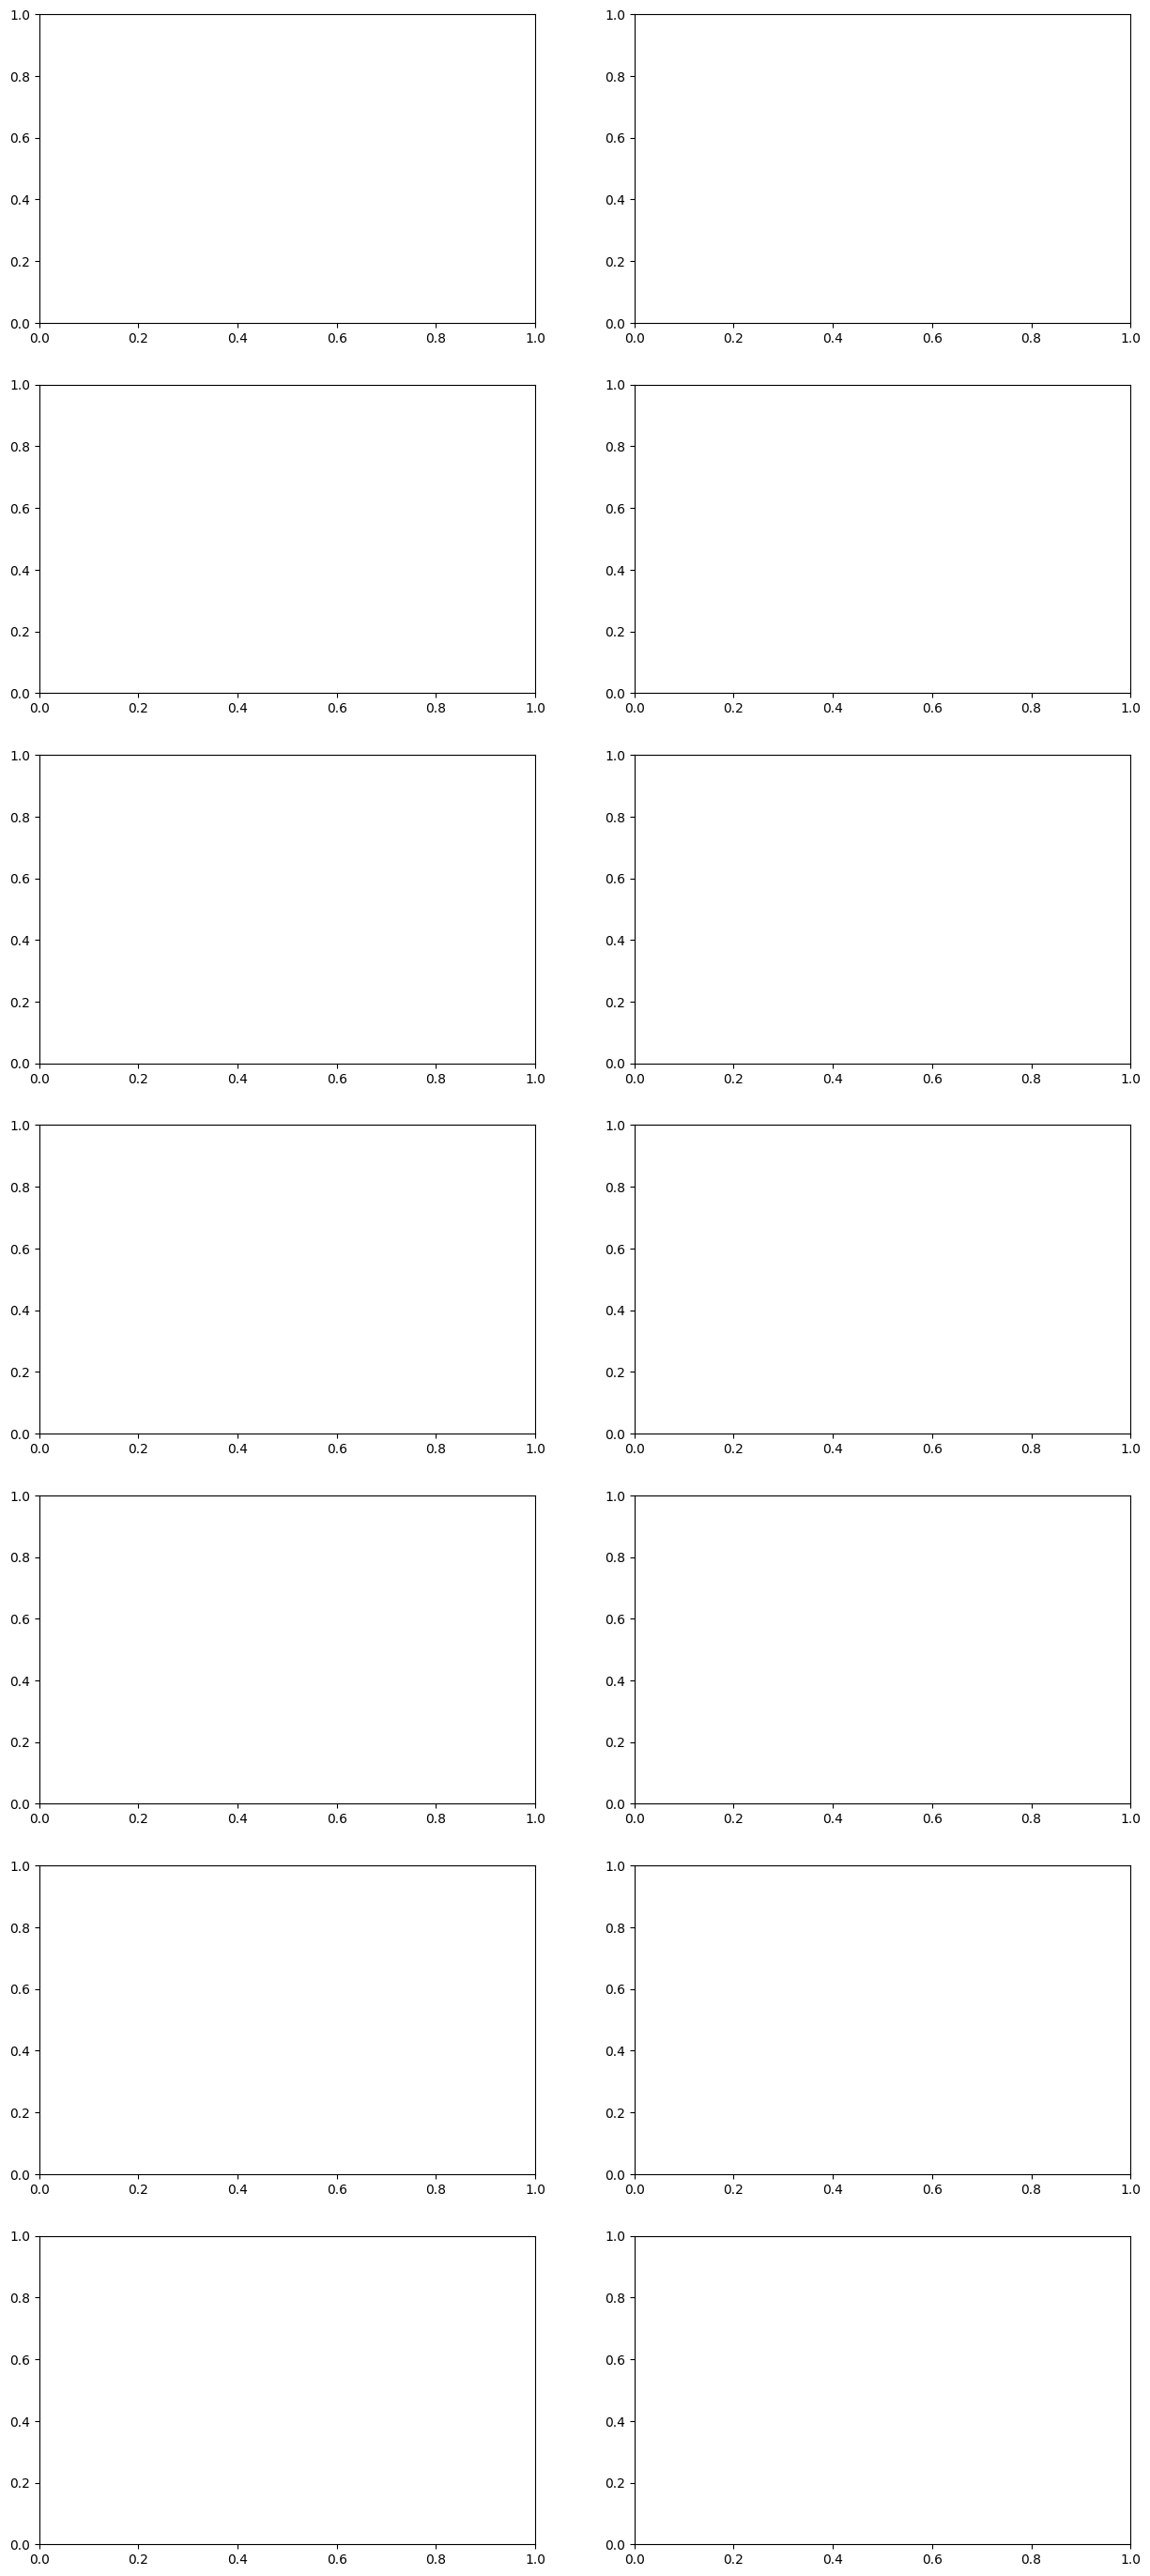

In [31]:
n_features = len(features_to_plot)
fig, axes = plt.subplots(
    nrows=(n_features + 1) // 2,  # Rows needed
    ncols=2,                      # Two columns per row
    figsize=(15, 5 * ((n_features + 1) // 2))  # Adjust height dynamically
)